In [2]:
from deepface import DeepFace as _DeepFace
import os as _os
import copy as _copy
from itertools import combinations
import matplotlib.pyplot as _plt

### Test deepface functions

In [3]:
# verify 
obj = _DeepFace.verify("../../data/DigiFace/subjects_0-1999_72_imgs/0/0.png",
                       "../../data/DigiFace/subjects_0-1999_72_imgs/0/1.png",
                       enforce_detection=False,prog_bar=False);
print(obj)

1/1 [==============================] - 0s 149ms/step
{'verified': True, 'distance': 0.2838611636154268, 'threshold': 0.4, 'model': 'VGG-Face', 'detector_backend': 'opencv', 'similarity_metric': 'cosine'}


In [4]:
# embeddings
embedding = _DeepFace.represent(img_path = "../../data/DigiFace/subjects_0-1999_72_imgs/0/0.png")

1/1 [==============================] - 0s 157ms/step


In [5]:
# analysis
obj = _DeepFace.analyze(img_path = "../../data/DigiFace/subjects_0-1999_72_imgs/0/0.png", 
                        actions = ['age', 'gender', 'race', 'emotion'],
                        prog_bar=False
)
print(obj)

1/1 [==============================] - 0s 80ms/step
{'age': 29, 'region': {'x': 11, 'y': 18, 'w': 89, 'h': 89}, 'gender': 'Man', 'race': {'asian': 9.30183008313179, 'indian': 6.115013360977173, 'black': 2.5921599939465523, 'white': 38.2030189037323, 'middle eastern': 18.679198622703552, 'latino hispanic': 25.108778476715088}, 'dominant_race': 'white', 'emotion': {'angry': 0.052500294987112284, 'disgust': 9.521839046400249e-10, 'fear': 0.0015692066881456412, 'happy': 2.2591797876891917e-08, 'sad': 0.7717558648437262, 'surprise': 1.0274273876120787e-06, 'neutral': 99.17417764663696}, 'dominant_emotion': 'neutral'}


In [24]:
df = _DeepFace.find(img_path = "../../data/DigiFace/subjects_0-1999_72_imgs/0/0.png", 
                    db_path = "../../data/DigiFace/subjects_0-1999_72_imgs/18",
                    enforce_detection=False
)

1/1 [==============================] - 0s 199ms/step
Representations stored in  ../../data/DigiFace/subjects_0-1999_72_imgs/18 / representations_vgg_face.pkl  file. Please delete this file when you add new identities in your database.
1/1 [==============================] - 0s 214ms/step
find function lasts  18.204442739486694  seconds


### Functions for psych study

In [2]:
def dbAnalysis(dbPath = "../../data/DigiFace/"):
    pass



def findImageDirectories(dir="./data/DigiFace/") :
    uniqueFaces = {}
    for root, dirs, files in _os.walk(dir):
        for dir in dirs :
            if dir.find("subjects") == -1 :
                uniqueFaces[int(dir)] = root+"/"+dir+"/"
                
    return uniqueFaces

def findImagesInDirectory(dir="./data/DigiFace/subjects_0-1999_72_imgs/0/", imageExtension="png"):
    uniqueFiles = {}
    for root, dirs, files in _os.walk(dir):
        for file in files :
            if file.find(imageExtension) != -1 :
                uniqueFiles[int(file[0:file.find(imageExtension)-1])] = root+"/"+file
                
    return uniqueFiles

def similarityAnalysis(dir="./data/DigiFace/", nComparisons = 10, nImages = 1) :
    imageDirs = findImageDirectories(dir)
    results = []
    
    iComparisons = 0 
    
    for imageDir1 in imageDirs :
        for imageDir2 in imageDirs :
            if imageDir1 == imageDir2 :
                continue
                
            images1 = findImagesInDirectory(imageDirs[imageDir1])
            images2 = findImagesInDirectory(imageDirs[imageDir2])
            
            print(imageDir1,imageDir2)
            iImages = 0 
            for image1 in images1:
                for image2 in images2:
                    
                    dfvr = _DeepFace.verify(images1[image1],images2[image2],enforce_detection=False,prog_bar=False);
                    print(dfvr['distance'])
                    results.append([imageDir1,image1,imageDir2,image2,dfvr['distance']])
                    
                    print((imageDir1,image1,imageDir2,image2),dfvr['distance'])
                    iImages += 1 
                    if iImages >= nImages:
                        break
                if iImages >= nImages:
                    break
            
            iComparisons += 1 
            
            if iComparisons >= nComparisons :
                break
        if iComparisons >= nComparisons :
            break
            
    return results

In [3]:
def samePerson(dir="./data/DigiFace/subjects_0-1999_72_imgs/1") :
    
    distances = []
    for root, dirs, files in _os.walk(dir):
        
        combins = combinations(files,2)
        
        icombins = 0
        for c in combins :
            icombins += 1
            dfvr = _DeepFace.verify(dir+"/"+c[0],dir+"/"+c[1],enforce_detection=False,prog_bar=False);
            distances.append(dfvr['distance'])
            
    return distances

In [36]:
%%capture

#d = findImageDirectories("./data/DigiFace/")
#f = findImagesInDirectory(d[0])
r = similarityAnalysis("./data/DigiFace/subjects_0-1999_72_imgs/",nComparisons=10000,nImages=1)

(array([  1.,   2.,   2.,   6.,  16.,  30.,  52.,  80., 103., 183., 208.,
        224., 253., 213., 196., 156.,  89.,  72.,  52.,  34.,  20.,   3.,
          4.,   0.,   0.,   0.,   0.,   0.,   0.,   1.]),
 array([0.21803666, 0.24158048, 0.26512431, 0.28866813, 0.31221196,
        0.33575578, 0.35929961, 0.38284343, 0.40638726, 0.42993108,
        0.45347491, 0.47701873, 0.50056256, 0.52410638, 0.54765021,
        0.57119403, 0.59473786, 0.61828168, 0.64182551, 0.66536933,
        0.68891316, 0.71245698, 0.73600081, 0.75954463, 0.78308846,
        0.80663228, 0.83017611, 0.85371994, 0.87726376, 0.90080759,
        0.92435141]),
 <BarContainer object of 30 artists>)

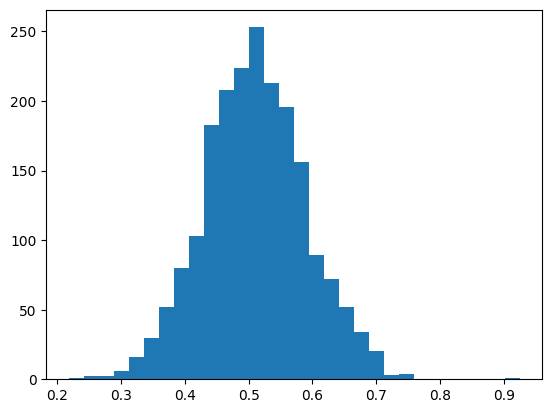

In [35]:
import numpy as _np
r = _np.array(r)
_plt.hist(r[:,4],30)

(array([  1.,   0.,   3.,   4.,  12.,  15.,  21.,  35.,  58.,  56.,  73.,
         88.,  82., 118., 125., 111., 111., 146., 112.,  90., 150., 107.,
        100., 104.,  83.,  72.,  78.,  66.,  79.,  69.,  47.,  51.,  55.,
         34.,  37.,  32.,  28.,  24.,  17.,  14.,  11.,  12.,   6.,   9.,
          2.,   2.,   2.,   2.,   1.,   1.]),
 array([0.03680133, 0.04793346, 0.05906559, 0.07019771, 0.08132984,
        0.09246196, 0.10359409, 0.11472622, 0.12585834, 0.13699047,
        0.1481226 , 0.15925472, 0.17038685, 0.18151898, 0.1926511 ,
        0.20378323, 0.21491535, 0.22604748, 0.23717961, 0.24831173,
        0.25944386, 0.27057599, 0.28170811, 0.29284024, 0.30397237,
        0.31510449, 0.32623662, 0.33736874, 0.34850087, 0.359633  ,
        0.37076512, 0.38189725, 0.39302938, 0.4041615 , 0.41529363,
        0.42642576, 0.43755788, 0.44869001, 0.45982213, 0.47095426,
        0.48208639, 0.49321851, 0.50435064, 0.51548277, 0.52661489,
        0.53774702, 0.54887914, 0.56001127, 0.

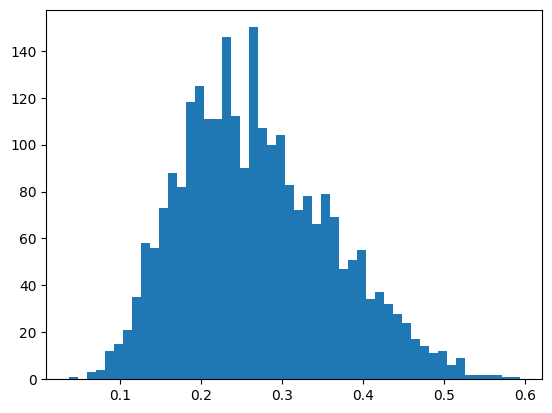

In [17]:
%%capture
d = samePerson();
_plt.hist(d,50)

In [13]:
_DeepFace.verify("./data/DigiFace/subjects_0-1999_72_imgs/0/0.png","./data/DigiFace/subjects_0-1999_72_imgs/0/5.png",enforce_detection=False,prog_bar=False)

1/1 [==============================] - 0s 176ms/step


{'verified': False,
 'distance': 0.4756669905648472,
 'threshold': 0.4,
 'model': 'VGG-Face',
 'detector_backend': 'opencv',
 'similarity_metric': 'cosine'}

In [6]:
_DeepFace.analyze?

Signature:
_DeepFace.analyze(
    img_path,
    actions=('emotion', 'age', 'gender', 'race'),
    models=None,
    enforce_detection=True,
    detector_backend='opencv',
    prog_bar=True,
)
Docstring:
This function analyzes facial attributes including age, gender, emotion and race

Parameters:
        img_path: exact image path, numpy array (BGR) or base64 encoded image could be passed. If you are going to analyze lots of images, then set this to list. e.g. img_path = ['img1.jpg', 'img2.jpg']

        actions (tuple): The default is ('age', 'gender', 'emotion', 'race'). You can drop some of those attributes.

        models: (Optional[dict]) facial attribute analysis models are built in every call of analyze function. You can pass pre-built models to speed the function up.

                models = {}
                models['age'] = DeepFace.build_model('Age')
                models['gender'] = DeepFace.build_model('Gender')
                models['emotion'] = DeepFace.build_model('Em